# Social Network Analysis - Exercise Sheet 2a

### Split Graphs
Networks often consist of "tightly knit cores" and a loosely connected periphery. A graph $G = (V,E)$ is called a *split graph*, iff G is complete or there exists a partition $\mathcal{V}=\{C,P\}$ of $V$ with $V=C\cup P$, such that
- $C$ is a clique, and
- $P$ is an *independent set*, i.e., $G[P]$ has no edges. 
In this exercise, your task is to find maximal split graphs in a given graph, i.e., which are maximal in their core or periphery size.

##### Exercise
Throughout this exercise, we will work with split graphs as triples (G,C,P), where G is the split graph (a *networkx* graph) and C and P are lists of core and periphery nodes (e.g., integers).
1. Implement the method `assert_split_graph` which, for a given triple $(G,C,P)$ ensures that G is a split graph with core C and periphery P. Implement this method using Python's *assert* statement. Use error messages, which explain why a given triple is not a split graph, in case a test fails.
- Implement the method `generate_split_graph`, which generates a split graph with a given core- and periphery size. Periphery nodes should be connected randomly to core nodes.
- Implement the method `plot_split_graph`, which draws a split graph.
    - Ensure that core and periphery can be distinguished well in the visualization.
    - Experiment with the different drawing method of networkx to find a suitable drawing. https://networkx.org/documentation/stable/reference/drawing.html
    - If the parameter draw_subgraphs is set to True, the method should draw two additional plots for the subgraphs induced by core and periphery.
    - Your plots only need to visualize relatively small graphs (i.e., with less than 50 nodes).
- Implement the method `find_split_graphs`. For an input graph $G=(V,E)$, (which itself is not necessarily a split graph) this method finds all split graphs $G[C \cup P]$ with the following properties:
    - There is no larger core than $C$ (i.e., with a higher number of nodes) in the input graph.
    - There is no larger periphery than $P$ in the input graph with regard to the given $C$.
- Find a network from your daily life that is (or contains) a split graph. Visualize this network and explain what insights you gain from its core and periphery.

##### Hints
* Submit your code zipped via [moodle](https://moodle.uni-kassel.de/course/view.php?id=11038) until 01.12.2023 23:55 MEZ
* You can use the [NetworkX](https://networkx.github.io/documentation/stable/) library. In particular, you can use it for computing maximal cliques.
* Ensure that your graphs do not have self-loops, using the provided method.
* Below the Implementation section is a Test section that can be used to check your code.



### Implementation
Implement your solution in this section.
Use the predefined methods.
You can add more methods if you want.

In [11]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# own methods
def get_colour_map(C:list, P:list) -> dict:
    '''
    :param C_size: list of core nodes
    :param P_size: list of periphery nodes
    
    :return: dictionary of colours for nodes, where blue is core and red is periphery
    '''
    colour_map = {clique: 'blue' for clique in C}
    colour_map.update({peripherie: 'red' for peripherie in P})
    return colour_map

def try_plot_layouts(G, C: list, P: list):
    """
    Tries to plot a graph G with different layouts.
    """
    colour_map = get_colour_map(C, P)
    nx.draw_networkx(G, with_labels= True, font_size= 5, node_size= 100, node_color= colour_map)
    plt.title("Networkx default")
    plt.show()

    if nx.is_planar(G):
        nx.draw_planar(G, with_labels= True, font_size= 5, node_size= 100, node_color= colour_map)
        plt.title("planar")
        plt.show()

    nx.draw_spectral(G, with_labels= True, font_size= 5, node_size= 100, node_color= colour_map)
    plt.title("spectral")
    plt.show()

    nx.draw_spring(G, with_labels= True, font_size= 5, node_size= 100, node_color= colour_map)
    plt.title("spring")
    plt.show()

    nx.draw_shell(G, with_labels= True, font_size= 5, node_size= 100, node_color= colour_map)
    plt.title("shell")
    plt.show()

    nx.draw_circular(G, with_labels= True, font_size= 5, node_size= 100, node_color= colour_map)
    plt.title("circular")
    plt.show()

def get_largest_sets(node_set_lists:list) -> list:
    '''
    :param node_set_lists: list of lists of nodes
    :return: list, which contains node lists of the maximal length w.r.t. the input list
    '''
    max_length = np.max([len(node_set_list) for node_set_list in node_set_lists])
    return [node_set_lists[i] for i in range(len(node_set_lists)) if (i in np.argwhere([len(node_set_list) for node_set_list in node_set_lists] == max_length).flatten().tolist())]

def get_cores(inputGraph):
    '''
    :param inputGraph: networkx graph
    :return: list of maximal cliques
    '''
    cliques = list(nx.find_cliques(inputGraph)) # all cliques
    return get_largest_sets(cliques) # maximal cliques

def get_independent_sets(inputGraph) -> list:
    '''
    :param inputGraph: networkx graph
    :return: list of maximal independent sets

    The cliques of the complement graph are the independent sets of the input graph.
    '''
    complement_graph = nx.complement(inputGraph)
    cliques = list(nx.find_cliques(complement_graph)) # cliques in complement graph == independent sets in original graph
    independent_sets = get_largest_sets(cliques)    # maximal independent sets
    return independent_sets


# methods given
def remove_self_loops(G):
    """
    Modifies a graph G such that all self-loops are removed.
    Returns G.
    """
    G.remove_edges_from(nx.selfloop_edges(G))
    return G

def print_info(G,C,P):
    """
    Prints some info about a given split graph.
    """
    # Print some info about this graph.
    print(f"Size of the split graph: {len(G)}")
    print(f"Core (size {len(C)}): {C} ")
    print(f"Periphery (size {len(P)}): {P}")

def assert_split_graph(G, C, P):
    """ Ensures that G is a split graph with Core C and periphery P"""
    # wrong data types
    assert isinstance(G, nx.Graph), "G is not a networkx Graph"
    assert isinstance(C, nx.Graph), "C is not a networkx Graph"
    assert isinstance(P, nx.Graph), "P is not a networkx Graph"

    # empty graph
    assert G.size() > 0, "G is empty"

    # C and P are not disjoint
    assert len(set(C.nodes()).intersection(set(P.nodes()))) == 0, "C and P are not disjoint"

    # C is not a clique
    assert C.size() == len(list(C.nodes()))*(len(list(C.nodes())) - 1)/2, "C is not a clique"

    # P is not an independent set
    assert P.size() == 0, "P is not an independent set"

    # C or P are not subsets of G
    assert set(C.nodes()).issubset(set(G.nodes())), "C is not a subset of G"
    assert set(P.nodes()).issubset(set(G.nodes())), "P is not a subset of G"


def generate_split_graph(C_size, P_size):
    """
    Generates a split graph G which has a core C with C_size nodes and a periphery P of P_size nodes.
    Connections between core and periphery are random.
    Returns the triple (G, C, P).
    """
    # core/ clique is a complete graph
    C = nx.complete_graph(range(C_size))

    # periphery is a set of nodes without edges between them
    P = nx.Graph()
    P.add_nodes_from(range(C_size, C_size + P_size))

    G = nx.union(C, P)

    p_nodes = list(G.nodes())[C_size:]
    c_nodes = list(G.nodes())[:C_size]

    # add random edges between periphery and core
    for start_node in p_nodes:
        number_nodes = np.random.randint(0, C_size) # at most to every core node: avoid multiple edges
        end_nodes = np.random.choice(a=c_nodes, size=number_nodes)
        G.add_edges_from([(start_node, end_node) for end_node in end_nodes])

    return G, C, P

def plot_split_graph(G, C, P, draw_subgraphs=True):
    """
    Plots a split graph G with core C and periphery P.
    If draw_subraphs is true, draws two additional plots, one for
    the subgraph of G induced by the core and one for the periphery.
    """
    assert_split_graph(G, C, P)

    # peripheral nodes are red, core nodes are blue
    colour_map = get_colour_map(C=C, P=P)
    colour_map = dict(sorted(colour_map.items()))   # colourmap order: (C nodes, P nodes) != order of nodes in G 
    
    nx.draw_circular(G, with_labels= True, font_size= 5, node_size= 100, node_color= colour_map.values())
    plt.title("Split graph")
    plt.show()

    if draw_subgraphs:
        for subgraph, name in [(C, "Core"), (P, "Periphery")]:
            nx.draw_circular(subgraph, with_labels= True, font_size= 5, node_size= 100)
            plt.title(name)
            plt.show()
    
    

def find_split_graphs(inputGraph):
    """
    Returns a list of triples (G,C,P), s.t. each G is a split graph with core C and periphery p.
    Only returns split graphs s.t. C is a maximal clique in the input graph, i.e., it is not possible 
    to add a further node v from the input graph to C while maintaining the clique property
    and there exists no other, larger maximal clique.
    Likewise, it is not possible to add a further node to P s.t. it is not connected to any of 
    the other periphery nodes and there exists no other, larger periphery with regard to C.
    """
    cores = get_cores(inputGraph)   # maximal cliques/ cores
    triples = []
    
    for core in cores:
        # remove all core nodes from the graph
        G = inputGraph.copy()
        G.remove_nodes_from(core)
        
        # find all maximal independent sets in the remaining graphs
        peripheries = [get_independent_sets(graph) for graph in [G]]

        triple = [(inputGraph.subgraph(set(core.copy()).union(set(P))), core, P) for P in peripheries[0]]   # (G, C, P)
        triples.extend(triple)
    return triples


### Testcases
Here you can test your methods. Please leave the tests unchanged. You can, however, add further tests, if you like.

In [12]:
# Generate a split graph.
mygraph = generate_split_graph(5, 15)

# The graph is a triple (G,C,P) that can be unpacked.
G,C,P = mygraph

# Print some info.
# The method-call below is equivalent to print_info(G, C, P).
print_info(*mygraph)

# Assert that mygraph is a split-graph with core C and partition P.
# If yes, nothing should happen. Otherwise, an error-message is shown.
assert_split_graph(*mygraph)

Size of the split graph: 20
Core (size 5): Graph with 5 nodes and 10 edges 
Periphery (size 15): Graph with 15 nodes and 0 edges


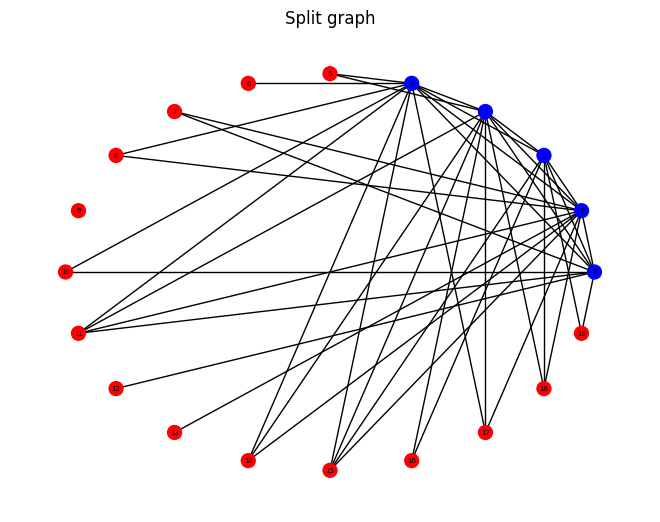

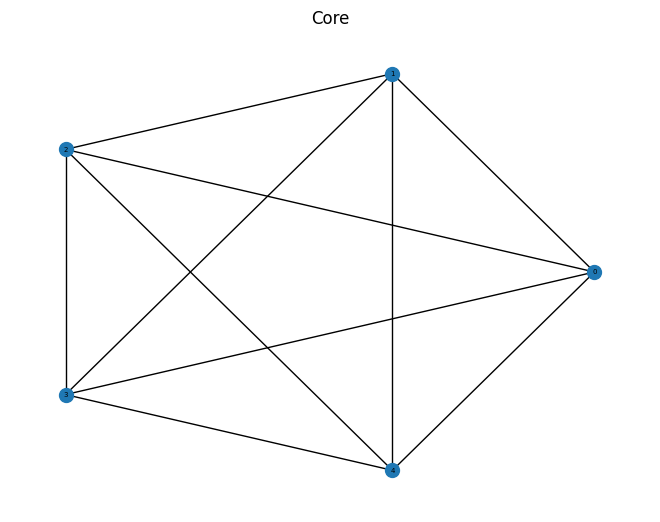

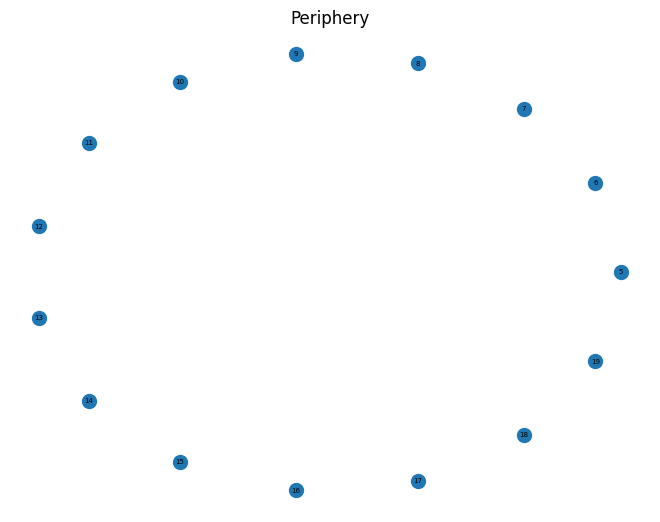

In [13]:
# Visualize a split graph.
plot_split_graph(G, C, P, draw_subgraphs=True)

In [14]:
# Find split graphs in a given graph.
splitGraphs = find_split_graphs(G)
foundGeneratedGraph = False
for s in splitGraphs:
    print_info(*s)
    if set(s[1]) == set(C) and set(s[2]) == set(P):
        foundGeneratedGraph = True
        print("-> Found the generated graph.")
assert foundGeneratedGraph, "Generated split graph could not be found"

Size of the split graph: 20
Core (size 5): [1, 3, 4, 0, 2] 
Periphery (size 15): [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
-> Found the generated graph.
Size of the split graph: 19
Core (size 5): [1, 3, 4, 0, 11] 
Periphery (size 14): [5, 6, 7, 8, 9, 10, 12, 13, 14, 17, 15, 16, 18, 19]
Size of the split graph: 19
Core (size 5): [1, 3, 4, 15, 2] 
Periphery (size 14): [5, 6, 8, 9, 13, 14, 16, 17, 18, 7, 19, 10, 11, 12]


### Split graphs in daily life
Here you can visualize a split graph example that occurs in daily life. Explain the insights you gain from this.

SBahn stations:  ['Altmarkt', 'Hauptbahnhof', 'Klinikum', 'Königsplatz', 'Murhardstraße', 'Stern', 'Weserspitze']


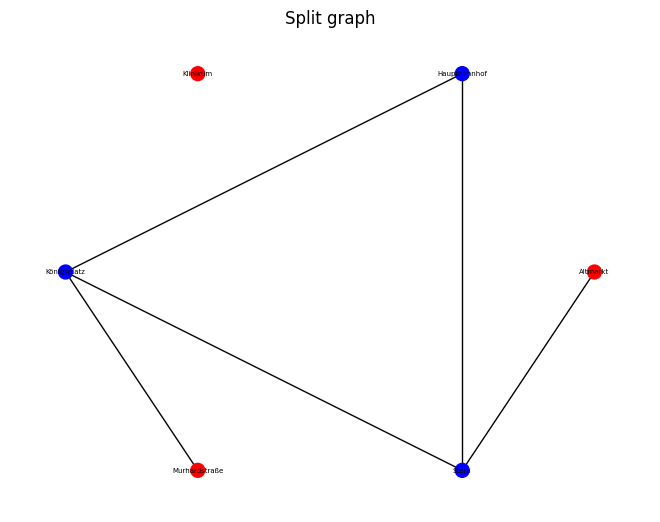

nodes which are not part of the splitgraph:
 {'Weserspitze'}


In [15]:
nodes = ['Stern', 'Weserspitze', 'Altmarkt', 'Murhardstraße', 'Klinikum', 'Königsplatz', 'Hauptbahnhof']
nodes.sort()
edges = [('Stern', 'Altmarkt'), ('Stern', 'Königsplatz'), ('Stern', 'Hauptbahnhof'), ('Weserspitze', 'Altmarkt'), ('Weserspitze', 'Klinikum'), ('Stern', 'Königsplatz'), ('Murhardstraße', 'Königsplatz'), ('Königsplatz', 'Hauptbahnhof')]

G = nx.Graph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)
print('SBahn stations: ', G.nodes())

# visualization
splitGraphs = find_split_graphs(G)
for s in splitGraphs:
    split_graph, C, P = s
    plot_split_graph(split_graph, split_graph.subgraph(C), split_graph.subgraph(P), draw_subgraphs=False)

    # findings
    print('nodes which are not part of the splitgraph:\n', set(G.nodes()).difference(set(split_graph.nodes())))

#### Insights

The graph models a simplified version of the S-Bahn connections I use.
The core represents the most valuable stations because it is the most efficient way to get to the other stations since many lines cross paths there.
The periphery represents the stations that are not as practical to get to the other stations because there are fewer lines that cross paths there.
However, they are often the goal of my journey, so they are still important to me.

#### Drawbacks
1. The visualization of the periphery drops some stations (e.g., Weserspitze) and thus, the plot lacks interpretability.
2. The postion of nodes does not correpsond to their geographical position (e.g., Klinikum and Altmarkt).
As a result, the visualization is not the best option to display the S-Bahn connections of Kassel, but it serves its purpose to identify cores.